# Customer Churn Analysis

In [1]:
#importing necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection  import cross_val_score 
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
from sklearn.tree import DecisionTreeClassifier

In [2]:
#importing Datset
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df=df.drop(["gender"],axis=1)
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
#applying label encoding to convert obj into int
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Label = ['customerID','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']

for i in Label:
    df[i] = le.fit_transform(df[i])
    
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,2564,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,5535,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


## Count Plot

<AxesSubplot:xlabel='Churn', ylabel='count'>

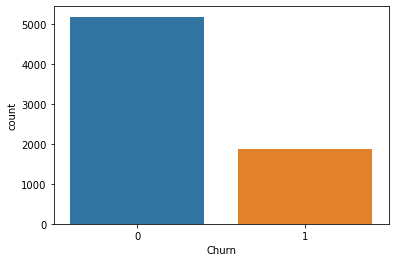

In [12]:
sns.countplot(df["Churn"])

## Pair Plot

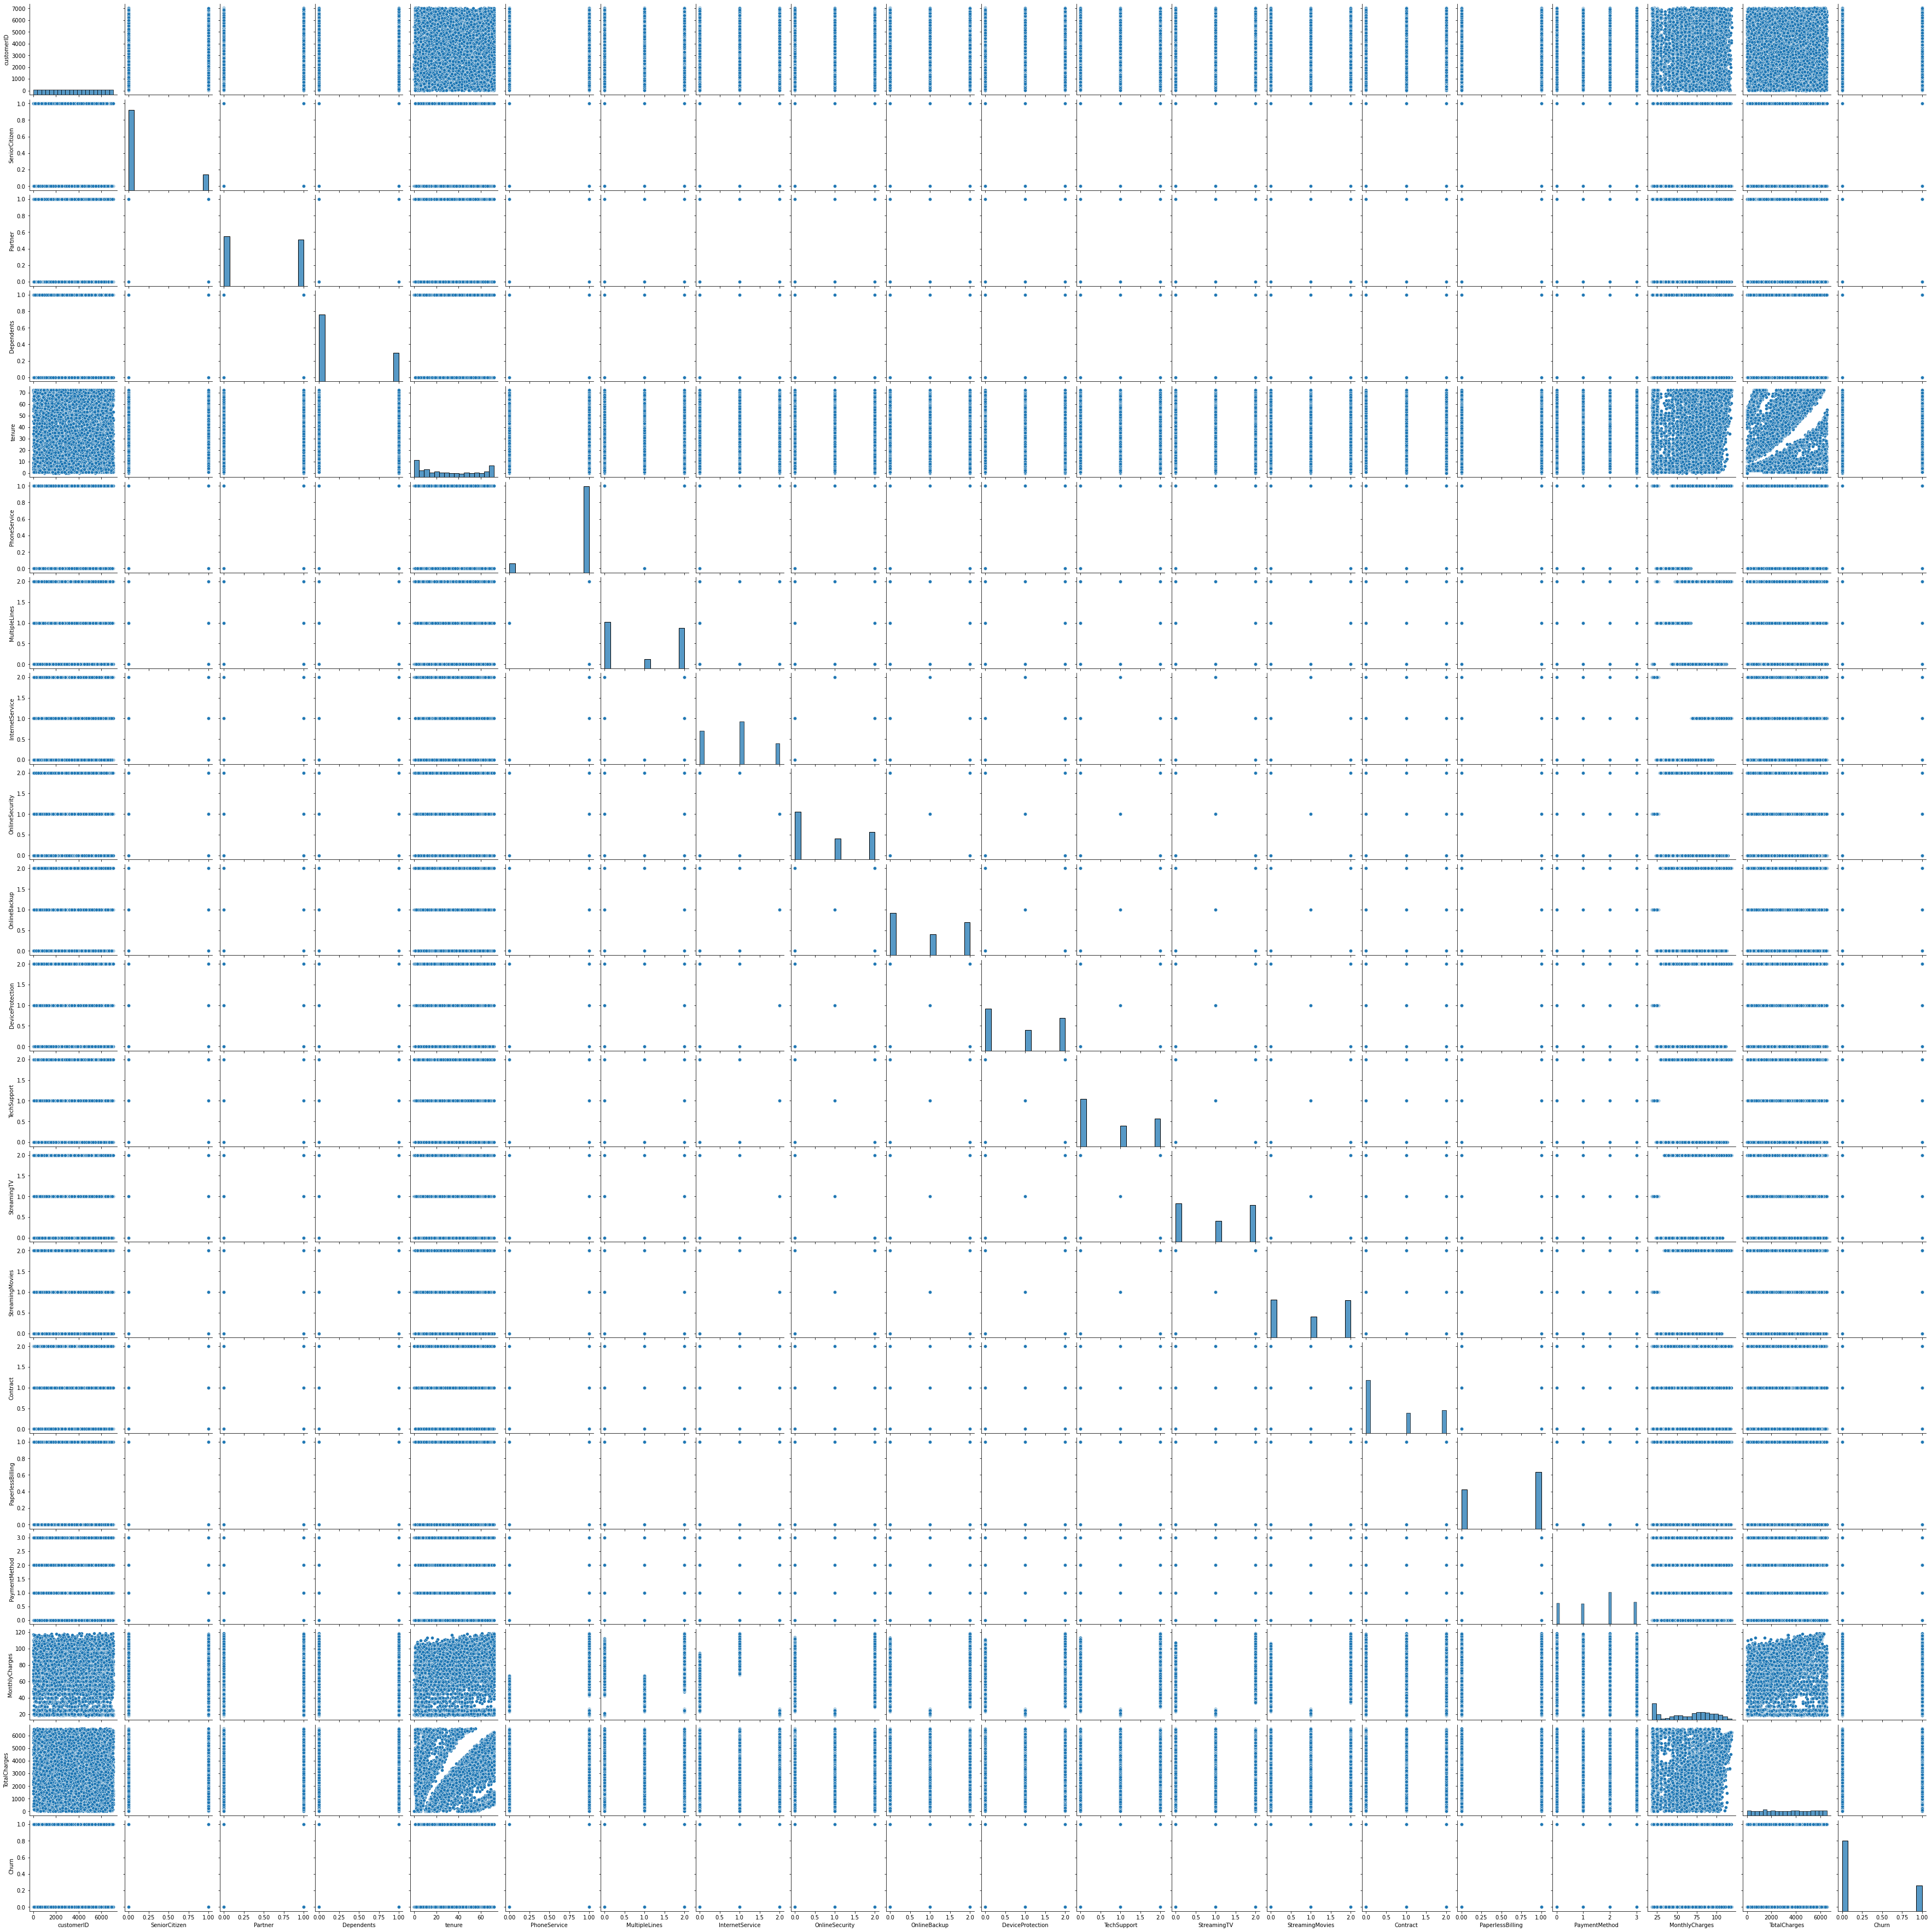

In [13]:
sns.pairplot(df)

## Scatter Plot

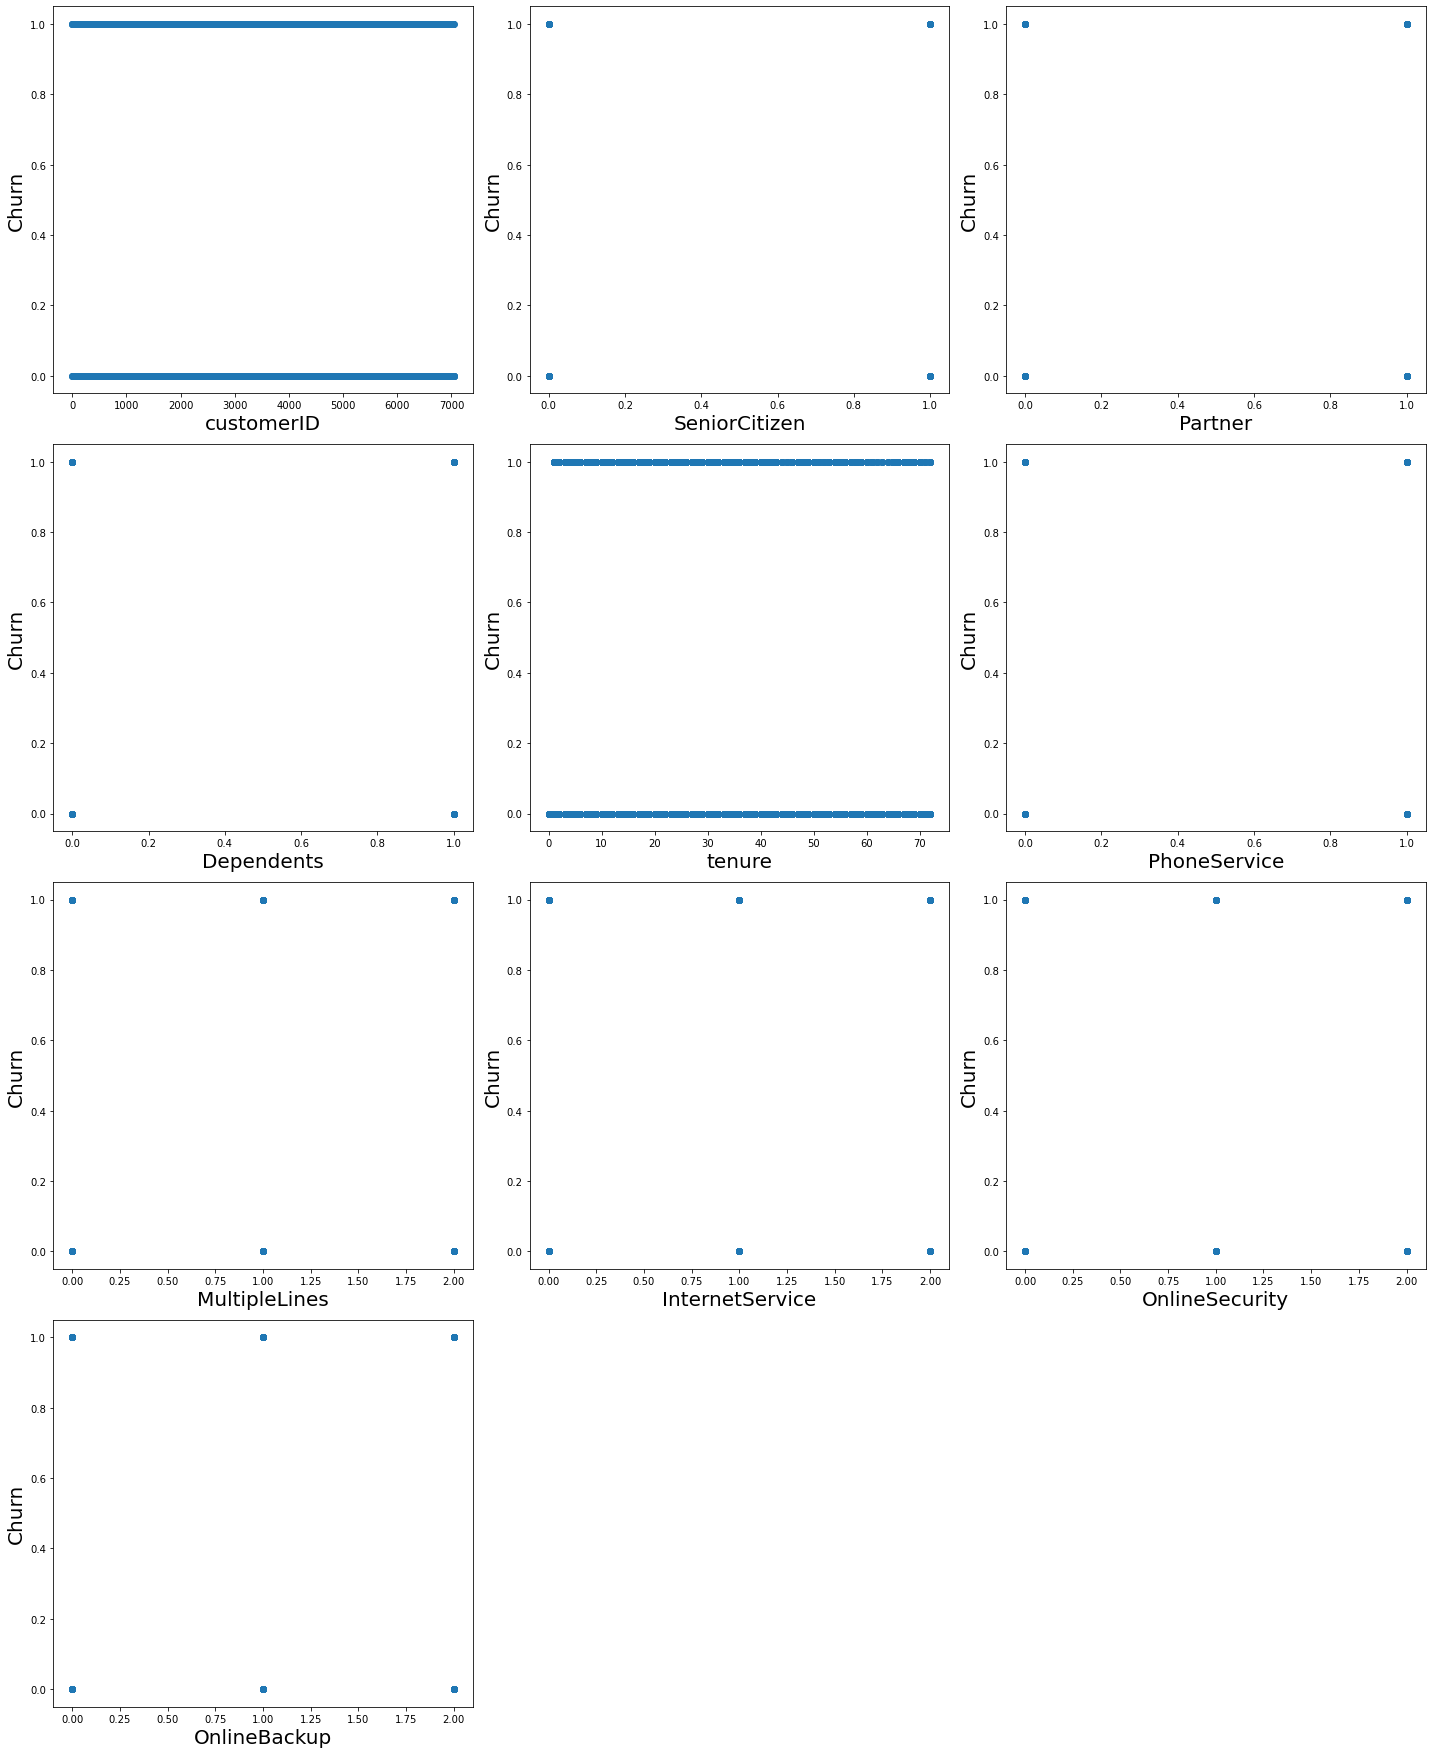

In [14]:
X=df.drop(columns='Churn')
Y=df[['Churn']]
plt.figure(figsize=(20,30))
plotnumber=1

for column in X:
    if plotnumber<=10:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Churn',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Dist and Box Plot

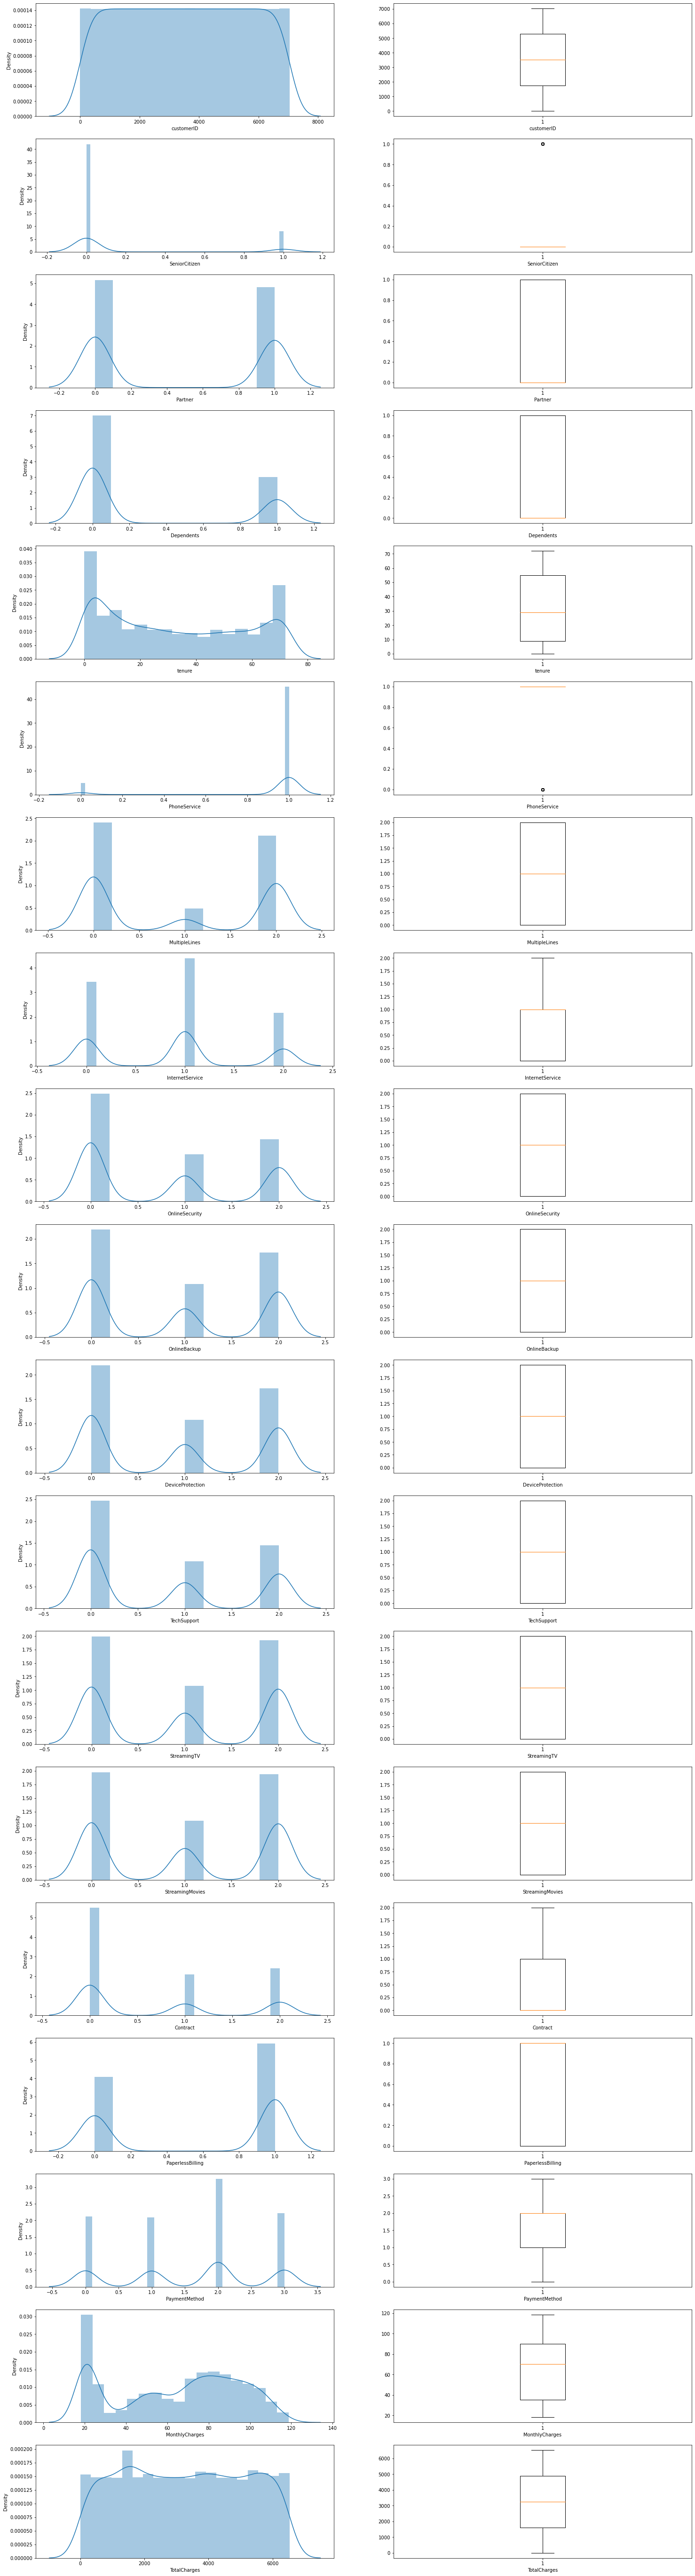

In [15]:
heart_NUM = ['customerID', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',]

#  plot Numerical Data
a = 19  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(25,100))

for i in heart_NUM:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

    

plt.show()

In [16]:
# checking for skewness
df.skew()

customerID          0.000000
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

In [18]:
# To find corelation using Heatmap and VIF technique
=df.corr().abs()
df_corr

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.002074,0.026729,0.012823,0.008035,0.006483,0.004316,0.012407,0.013292,0.003334,0.006918,0.001140,0.007777,0.016746,0.015028,0.001945,0.011604,0.003916,0.003027,0.017447
SeniorCitizen,0.002074,1.000000,0.016479,0.211185,0.016567,0.008576,0.146185,0.032310,0.128221,0.013632,0.021398,0.151268,0.030776,0.047266,0.142554,0.156530,0.038551,0.220173,0.037653,0.150889
Partner,0.026729,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,0.014877,0.154798,0.096848,0.059568,0.150448
Dependents,0.012823,0.211185,0.452676,1.000000,0.159712,0.001762,0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,0.111377,0.040292,0.113890,0.009572,0.164221
tenure,0.008035,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,0.370436,0.247900,0.158523,0.352229
PhoneService,0.006483,0.008576,0.017706,0.001762,0.008448,1.000000,0.020538,0.387436,0.015198,0.024105,0.003727,0.019158,0.055353,0.043870,0.002247,0.016505,0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,0.146185,0.142410,0.024991,0.343032,0.020538,1.000000,0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,0.176793,0.433576,0.114955,0.038037
InternetService,0.012407,0.032310,0.000891,0.044590,0.030359,0.387436,0.109216,1.000000,0.028416,0.036138,0.044944,0.026047,0.107417,0.098350,0.099721,0.138625,0.086140,0.323260,0.055724,0.047291
OnlineSecurity,0.013292,0.128221,0.150828,0.152166,0.325468,0.015198,0.007141,0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,0.157641,0.096726,0.053878,0.042357,0.289309
OnlineBackup,0.003334,0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,0.013370,0.124847,0.119777,0.090756,0.195525


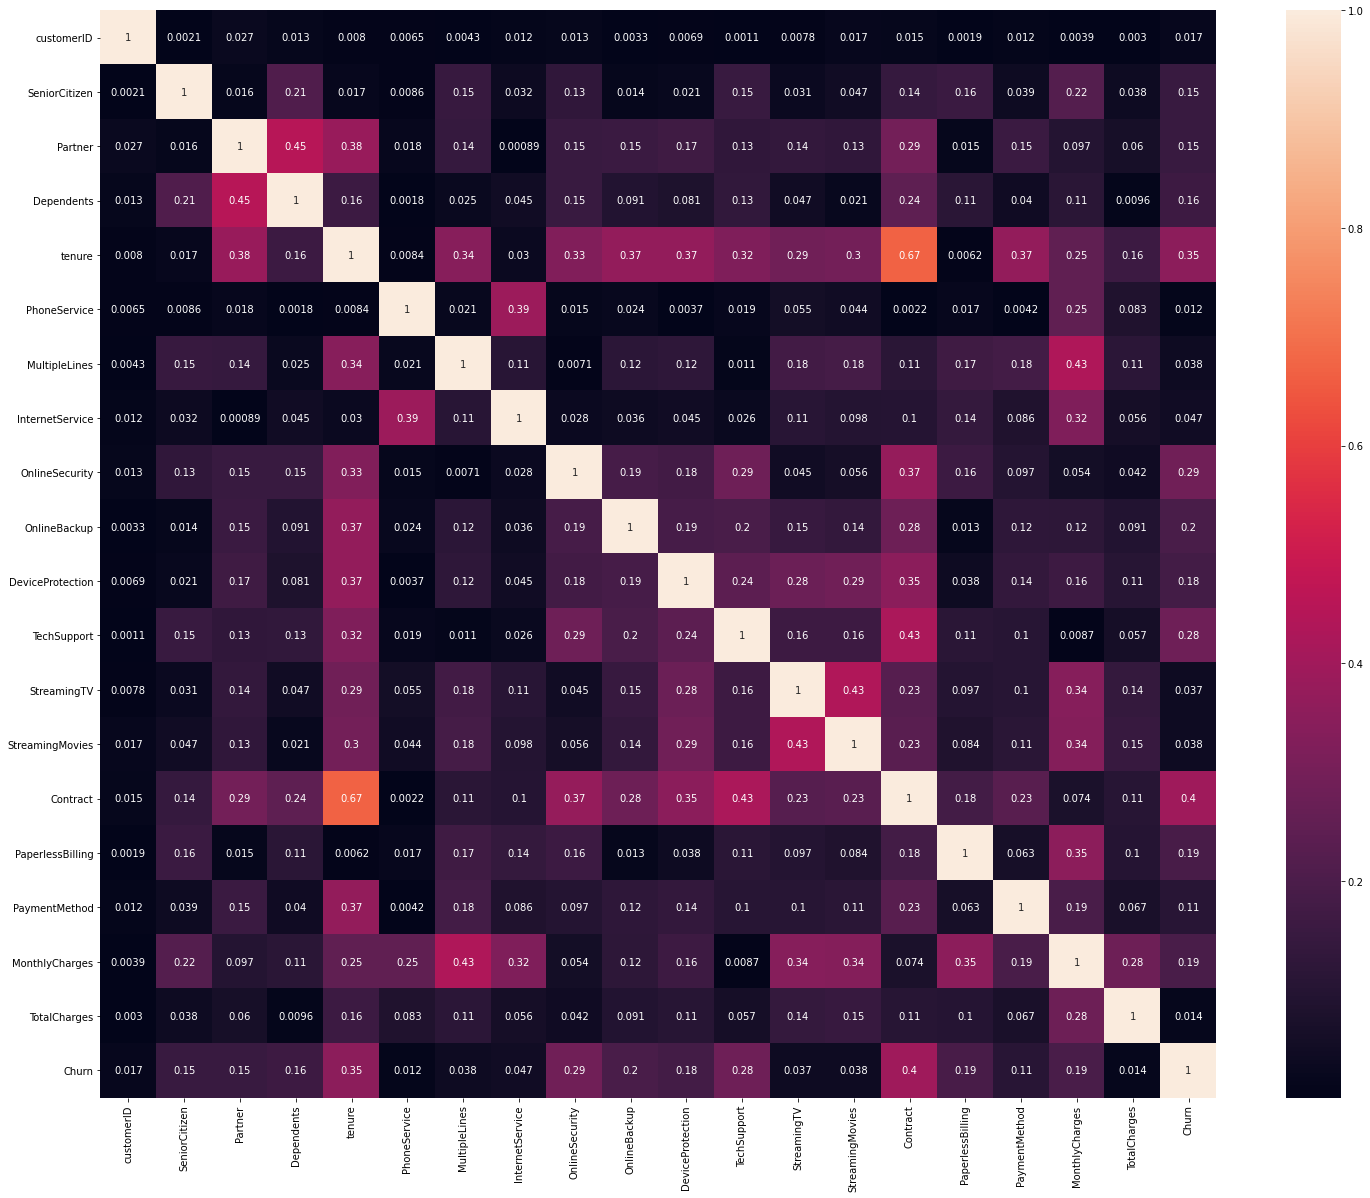

In [20]:
plt.figure(figsize=(25,20))
sns.heatmap(df_corr,annot=True)
plt.show()

In [21]:
X=df.drop(columns='Churn')
Y=df[['Churn']]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.002401,customerID
1,1.149736,SeniorCitizen
2,1.461896,Partner
3,1.382004,Dependents
4,2.753209,tenure
5,1.622292,PhoneService
6,1.392844,MultipleLines
7,1.826726,InternetService
8,1.247539,OnlineSecurity
9,1.186212,OnlineBackup


<AxesSubplot:xlabel='Churn', ylabel='count'>

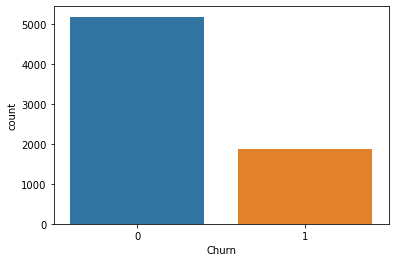

In [22]:
#using countplot to check weather the data is imbalnced
sns.countplot(df["Churn"])

In [23]:
X=df.drop(columns='Churn')
Y=df[['Churn']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,stratify=Y,random_state=21) 
# Imbalanced label is dealt with using stratify technique

# KNN

In [24]:
knn=KNeighborsClassifier()

In [25]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [26]:
Y_pred=knn.predict(X_test)

In [27]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[1364,  188],
       [ 471,   90]], dtype=int64)

In [28]:
accuracy=accuracy_score(Y_test,Y_pred)

In [29]:
accuracy

0.6881211547562707

In [30]:
auc=roc_auc_score(Y_test,Y_pred)

In [31]:
auc

0.5196468934340371

In [34]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81      1552
           1       0.32      0.16      0.21       561

    accuracy                           0.69      2113
   macro avg       0.53      0.52      0.51      2113
weighted avg       0.63      0.69      0.65      2113



In [32]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

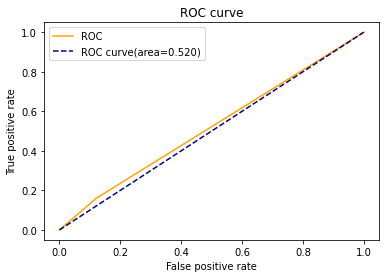

In [33]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# USING KNN WITH HYPERPARAMETER TUNING

In [35]:
knn=KNeighborsClassifier()

In [36]:
param_grid=[
    {'algorithm':['kd_tree','brute'],
    'leaf_size':[15,18],
    'n_neighbors':[3,5,7]
    }
]

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1,verbose=2)

In [39]:
clf.fit(X_train,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute'],
                          'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]}],
             verbose=2)

In [40]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [41]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [42]:
accuracy=accuracy_score(Y_test,Y_pred)

In [43]:
accuracy

0.6994794131566493

In [44]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[1410,  142],
       [ 493,   68]], dtype=int64)

In [45]:
auc=roc_auc_score(Y_test,Y_pred)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1552
           1       0.32      0.12      0.18       561

    accuracy                           0.70      2113
   macro avg       0.53      0.51      0.50      2113
weighted avg       0.63      0.70      0.65      2113



In [46]:
auc

0.5148586379256482

In [47]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

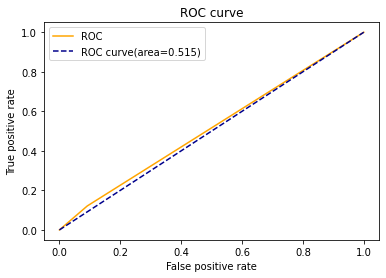

In [48]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
Y_pred=rf_classifier.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1411  141]
 [ 335  226]]
0.7747278750591576
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1552
           1       0.62      0.40      0.49       561

    accuracy                           0.77      2113
   macro avg       0.71      0.66      0.67      2113
weighted avg       0.76      0.77      0.76      2113



In [52]:
auc=roc_auc_score(Y_test,Y_pred)

In [53]:
auc

0.6560007672234779

In [54]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

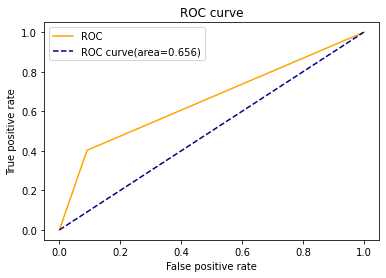

In [55]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# Random Forest with Random and Grid Search CV

In [56]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [57]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [58]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'entropy'}

In [59]:
best_random_grid=rf_randomcv.best_estimator_

In [60]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=670, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=14,
                       n_estimators=1800)

In [61]:
from sklearn.metrics import accuracy_score
Y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[1422  130]
 [ 300  261]]
Accuracy Score 0.79649787032655
Classification report:               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1552
           1       0.67      0.47      0.55       561

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



# GRID SEARCH CV

In [62]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'entropy'}

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100,200,300,400] 
                     
                     
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [670], 'max_features': ['sqrt'], 'min_samples_leaf': [8, 10, 12], 'min_samples_split': [2, 3, 4], 'n_estimators': [100, 200, 300, 400]}


In [64]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [670],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [65]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=670, max_features='sqrt',
                       min_samples_leaf=8, n_estimators=200)

In [66]:
best_grid=grid_search.best_estimator_

In [67]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=670, max_features='sqrt',
                       min_samples_leaf=8, n_estimators=200)

In [68]:
Y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[1418  134]
 [ 300  261]]
Accuracy Score 0.7946048272598202
Classification report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.47      0.55       561

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [69]:
accuracy=accuracy_score(Y_test,Y_pred)

In [70]:
accuracy

0.7946048272598202

In [71]:
auc=roc_auc_score(Y_test,Y_pred)

In [72]:
auc

0.6894502177628314

In [73]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

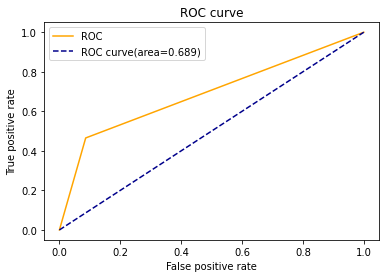

In [74]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# Decision Tree

In [75]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [76]:
Y_pred=dt.predict(X_test)


In [77]:
accuracy=accuracy_score(Y_test,Y_pred)

In [78]:
accuracy

0.709891150023663

In [79]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[1243,  309],
       [ 304,  257]], dtype=int64)

In [80]:
auc=roc_auc_score(Y_test,Y_pred)

In [81]:
auc

0.6295062893948583

In [84]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1552
           1       0.45      0.46      0.46       561

    accuracy                           0.71      2113
   macro avg       0.63      0.63      0.63      2113
weighted avg       0.71      0.71      0.71      2113



In [82]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

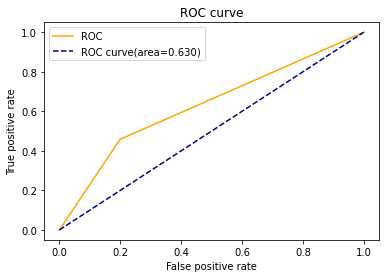

In [83]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# DECISIONTREE WITH HYPER PARAMETER

In [85]:
dt=DecisionTreeClassifier()


In [86]:
param_grid = {
               'max_depth': range(3,12,3),
               'min_samples_split': range(4,10,3),
               'min_samples_leaf': range(3,10,3),
              'criterion':['entropy','gini']}


In [87]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1,verbose=2)

In [88]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 12, 3),
                         'min_samples_leaf': range(3, 10, 3),
                         'min_samples_split': range(4, 10, 3)},
             verbose=2)

In [89]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [90]:
Y_pred=clf.predict(X_test)


In [91]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[1349,  203],
       [ 253,  308]], dtype=int64)

In [92]:
accuracy=accuracy_score(Y_test,Y_pred)

In [93]:
accuracy

0.7841930903928065

In [94]:
auc=roc_auc_score(Y_test,Y_pred)

In [95]:
auc

0.7091103193854862

In [98]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1552
           1       0.60      0.55      0.57       561

    accuracy                           0.78      2113
   macro avg       0.72      0.71      0.72      2113
weighted avg       0.78      0.78      0.78      2113



In [96]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

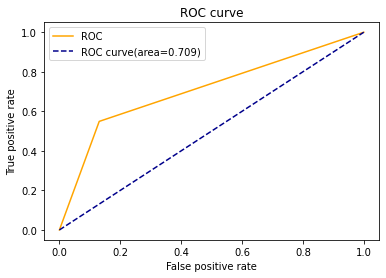

In [97]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# Gradient Boosting

In [99]:
gbdt=GradientBoostingClassifier()

In [100]:
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier()

In [101]:
Y_pred=gbdt.predict(X_test)


In [102]:
accuracy=accuracy_score(Y_test,Y_pred)

In [103]:
accuracy

0.792238523426408

In [104]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[1401,  151],
       [ 288,  273]], dtype=int64)

In [105]:
auc=roc_auc_score(Y_test,Y_pred)

In [106]:
auc

0.6946686008048955

In [109]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.64      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [107]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

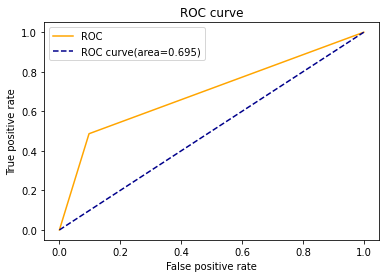

In [108]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# GBDT WITH HYPER PARAMETER

In [110]:
gbdt=GradientBoostingClassifier()

In [111]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'learning_rate':np.arange(0.1,1,0.1)}

In [112]:
clf=GridSearchCV(gbdt,param_grid,cv=5,n_jobs=-1,verbose=2)

In [113]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)},
             verbose=2)

In [114]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [115]:
Y_pred=clf.predict(X_test)


In [116]:
accuracy=accuracy_score(Y_test,Y_pred)

In [117]:
accuracy

0.7941315664931378

In [118]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[1403,  149],
       [ 286,  275]], dtype=int64)

In [119]:
auc=roc_auc_score(Y_test,Y_pred)

In [120]:
auc

0.6970954618960987

In [123]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.65      0.49      0.56       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [121]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

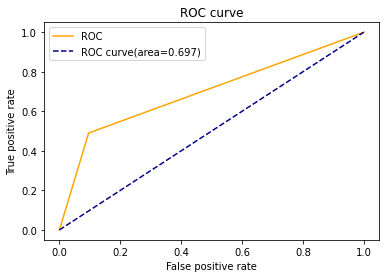

In [122]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [124]:
md=[knn,rf,dt,gbdt]
import pickle
filename="Customer Churn Analysis.pkl"
pickle.dump(md,open(filename,"wb"))

# Conclusion:
1. Conducted 4 models on Customer Churn Analysis dataset namely 
2. KNN, Random Forest, Desicion Tree and Gradient Boosting with Hyperparameter tuning 
3. It comes to a conclusion that Random Forest Model is providing best score for Customer Churn Analysis dataset 
4. Accuracy=0.7946048272598202, with higher AUC ROC value